In [319]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [320]:
# Read the data into a Pandas DataFrame
Hospital_infect_data = pd.read_csv('Resources/Healthcare_Associated_Infections_-_Hospital.csv')
Hospital_infect_data.head(10)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,No Different than National Benchmark,0.165,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,3.249,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1485,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,No Different than National Benchmark,2.034,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,No Different than National Benchmark,2,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
5,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Central line-associated bloodstream infections...,HAI_1_SIR,No Different than National Benchmark,0.983,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
6,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI Lower Confidence Limit,HAI_1a_CI_LOWER,Worse than the National Benchmark,1.168,NaN,07/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
7,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI Upper Confidence Limit,HAI_1a_CI_UPPER,Worse than the National Benchmark,7.068,NaN,07/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
8,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI Central Line Days,HAI_1a_DOPC_DAYS,Worse than the National Benchmark,1045,NaN,07/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
9,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI Predicted Cases,HAI_1a_ELIGCASES,Worse than the National Benchmark,1.568,NaN,07/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"


In [321]:
# Get a brief summary of the dataframe.
Hospital_infect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222864 entries, 0 to 222863
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Provider ID           222864 non-null  int64 
 1   Hospital Name         222864 non-null  object
 2   Address               222864 non-null  object
 3   City                  222864 non-null  object
 4   State                 222864 non-null  object
 5   ZIP Code              222864 non-null  int64 
 6   County Name           222240 non-null  object
 7   Phone Number          222864 non-null  int64 
 8   Measure Name          222864 non-null  object
 9   Measure ID            222864 non-null  object
 10  Compared to National  222864 non-null  object
 11  Score                 222864 non-null  object
 12  Footnote              141684 non-null  object
 13  Measure Start Date    222864 non-null  object
 14  Measure End Date      222864 non-null  object
 15  Location         

In [322]:
# Convert 'Score' column to numeric, coercing errors to NaN
Hospital_infect_data['Score'] = pd.to_numeric(Hospital_infect_data['Score'], errors='coerce')

# Check if 'Score' column conversion was successful
print(Hospital_infect_data['Score'].dtype)  # Should print 'float64' or 'int64'

float64


In [323]:
# Check for missing values
missing_values = Hospital_infect_data.isnull().sum()
missing_values

Provider ID                  0
Hospital Name                0
Address                      0
City                         0
State                        0
ZIP Code                     0
County Name                624
Phone Number                 0
Measure Name                 0
Measure ID                   0
Compared to National         0
Score                   124717
Footnote                 81180
Measure Start Date           0
Measure End Date             0
Location                     0
dtype: int64

In [324]:
# Check for duplicates in Uber data
duplicates = Hospital_infect_data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print or use num_duplicates as needed
print("Number of duplicate rows in Hospital_infect_data:", num_duplicates)

Number of duplicate rows in Hospital_infect_data: 0


In [325]:
# Get unique categories in 'Compared to National'
unique_Compared_National = Hospital_infect_data['Compared to National'].unique()

# Display the unique Compared to National
print("Unique Compared to National:")
print(unique_Compared_National)

Unique Compared to National:
['No Different than National Benchmark'
 'Worse than the National Benchmark' 'Better than the National Benchmark'
 'Not Available']


In [326]:
# Count the number of 'Not Available' entries
not_available_count = Hospital_infect_data[Hospital_infect_data['Compared to National'] == 'Not Available'].shape[0]
print(f"\nNumber of 'Not Available' entries: {not_available_count}")


Number of 'Not Available' entries: 121398


In [327]:
print(Hospital_infect_data['Measure Name'].unique())

# Count the number of unique measure names
num_unique_measure_names = Hospital_infect_data['Measure Name'].nunique()

print(f"Number of unique measure names: {num_unique_measure_names}")

['CLABSI: Lower Confidence Limit' 'CLABSI: Upper Confidence Limit'
 'CLABSI: Number of Procedures' 'CLABSI: Predicted Cases'
 'CLABSI: Observed Cases'
 'Central line-associated bloodstream infections (CLABSI) in ICUs and select wards'
 'CLABSI Lower Confidence Limit' 'CLABSI Upper Confidence Limit'
 'CLABSI Central Line Days' 'CLABSI Predicted Cases'
 'CLABSI Observed Cases'
 'Central line-associated blood stream infections (CLABSI) in ICUs only'
 'CAUTI: Lower Confidence Limit' 'CAUTI: Upper Confidence Limit'
 'CAUTI: Number of Procedures' 'CAUTI: Predicted Cases'
 'CAUTI: Observed Cases'
 'Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards'
 'CAUTI Lower Confidence Limit' 'CAUTI Upper Confidence Limit'
 'CAUTI Urinary Catheter Days' 'CAUTI Predicted Cases'
 'CAUTI Observed Cases'
 'Catheter-Associated Urinary Tract Infections (CAUTI) in ICUs only'
 'SSI: Colon Lower Confidence Limit' 'SSI: Colon Upper Confidence Limit'
 'C.diff Patient Days' 'SSI: Colon, Nu

In [328]:
# Convert 'Measure End Date' to datetime
Hospital_infect_data['Measure End Date'] = pd.to_datetime(Hospital_infect_data['Measure End Date'], errors='coerce')

# Extract year from 'Measure End Date'
Hospital_infect_data['Year'] = Hospital_infect_data['Measure End Date'].dt.year

# Count the number of records per year
records_per_year = Hospital_infect_data['Year'].value_counts().sort_index()

print("Number of records per year:")
print(records_per_year)

Number of records per year:
Year
2015    222864
Name: count, dtype: int64


# ETA: Hospital Performance Compared to National Benchmarks

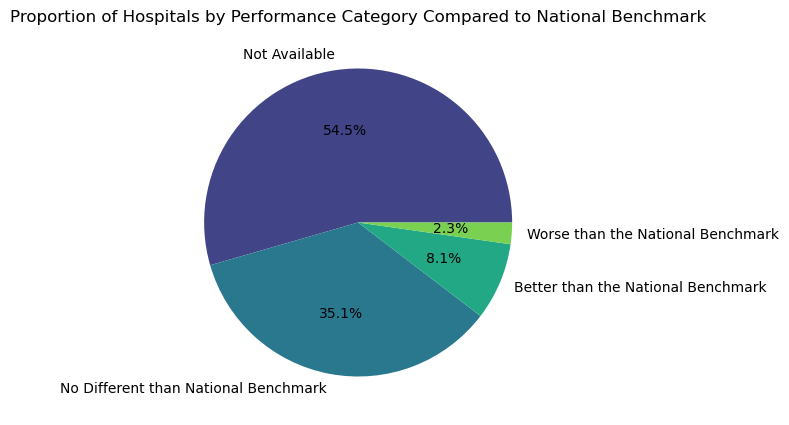

In [429]:
# Count the number of hospitals in each performance category
performance_counts = Hospital_infect_data['Compared to National'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(performance_counts)))
plt.title('Proportion of Hospitals by Performance Category Compared to National Benchmark')
plt.show()

Data cleaning needed since large portion of Not available data

# ETA-Measure-Specific Analysis

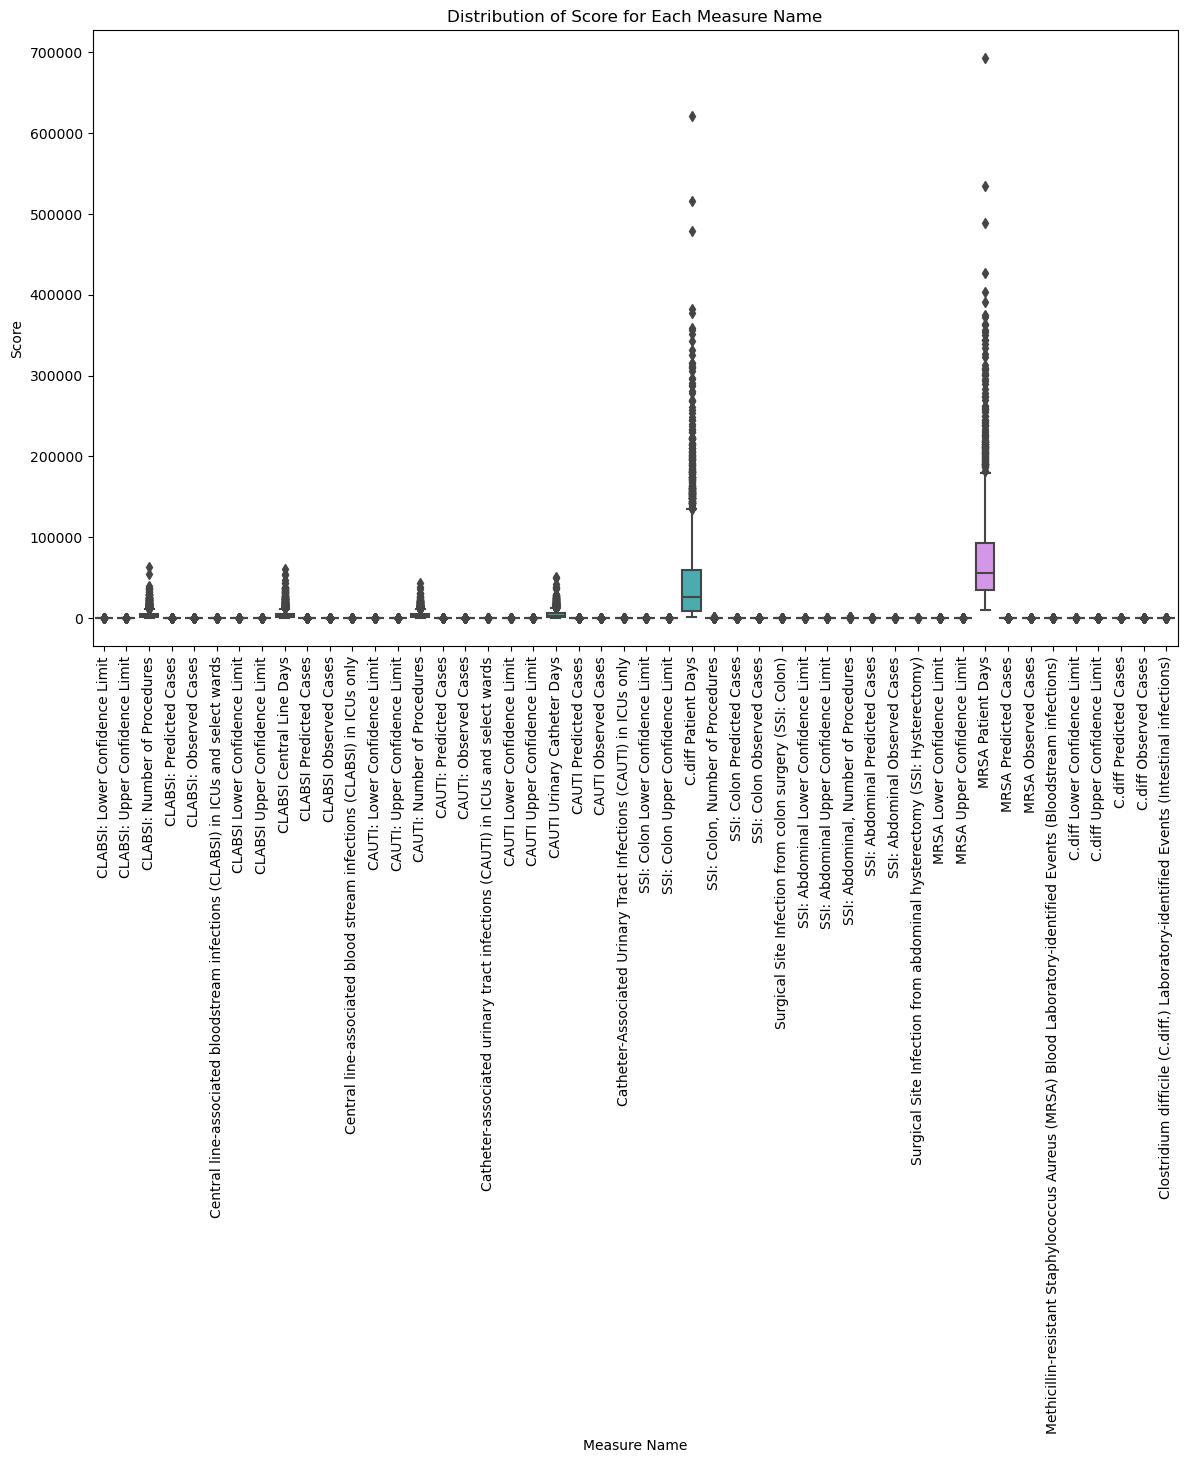

In [430]:
# Group by the 'Measure Name' column and describe the 'Score' column
measure_name_distribution = Hospital_infect_data.groupby('Measure Name')['Score'].describe()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Measure Name', y='Score', data=Hospital_infect_data)
plt.xticks(rotation=90)
plt.title('Distribution of Score for Each Measure Name')
plt.show()


Data has outliers.

# ETA- Regional Trend

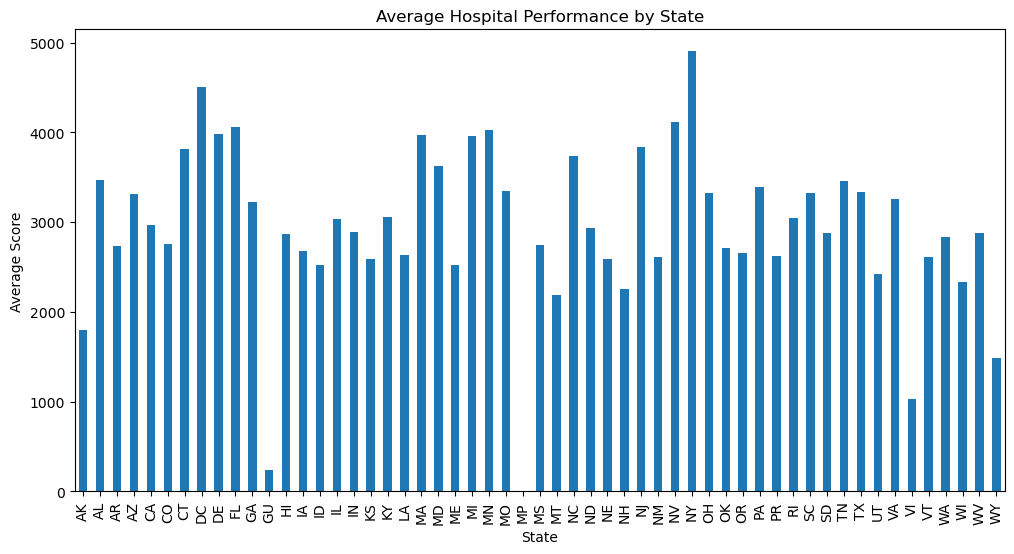

In [335]:
#Are hospitals in certain states performing better or worse than others? . High score poor management of infections.

state_performance = Hospital_infect_data.groupby('State')['Score'].mean()


plt.figure(figsize=(12, 6))
state_performance.plot(kind='bar')
plt.title('Average Hospital Performance by State')
plt.xlabel('State')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

Not availale data needed to be handled

# Data cleaning & data wrangling 

# Remove missing values

In [337]:
# Remove rows where 'Score' is missing
hospital_data_cleaned = Hospital_infect_data.dropna(subset=['Score'])

# Check the shape of the cleaned data
print(f"Data shape after removing missing scores: {hospital_data_cleaned.shape}")

# Optional: Check if there are any remaining missing values in 'Score'
print(f"Remaining missing values in 'Score': {hospital_data_cleaned['Score'].isna().sum()}")


Data shape after removing missing scores: (98147, 18)
Remaining missing values in 'Score': 0


In [338]:
# Remove rows where 'Compared to National' is 'Not Available'
hospital_data_filtered = hospital_data_cleaned[hospital_data_cleaned['Compared to National'] != 'Not Available']

# Check the shape of the filtered data
print(f"Data shape after removing 'Not Available' entries: {hospital_data_filtered.shape}")

# Optional: Check if there are any remaining 'Not Available' values
print(f"Remaining 'Not Available' entries: {hospital_data_filtered[hospital_data_filtered['Compared to National'] == 'Not Available'].shape[0]}")

Data shape after removing 'Not Available' entries: (98147, 18)
Remaining 'Not Available' entries: 0


In [344]:
hospital_data_filtered['Measure Name'] = hospital_data_filtered['Measure Name'].replace({
    'Central line-associated bloodstream infections (CLABSI) in ICUs and select wards': 
    'CLABSI: CLABSI_ICUs&select wards',
    
    'CLABSI Lower Confidence Limit': 
    'CLABSI: Lower Confidence Limit',
    
    'CLABSI Upper Confidence Limit': 
    'CLABSI: Upper Confidence Limit',
    
    'CLABSI Central Line Days': 
    'CLABSI: Central Line Days',
    
    'CLABSI Predicted Cases': 
    'CLABSI: Predicted Cases',
    
    'CLABSI Observed Cases': 
    'CLABSI: Observed Cases',
    
    'Central line-associated blood stream infections (CLABSI) in ICUs only': 
    'CLABSI: CLABSI_ICUs only',
    
    'Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards': 
    'CAUTI: CAUTI_ICUs&select wards',
    
    'CAUTI Lower Confidence Limit': 
    'CAUTI: CAUTI Lower Confidence Limit',
    
    'CAUTI Upper Confidence Limit': 
    'CAUTI: Upper Confidence Limit',
    
    'CAUTI Urinary Catheter Days': 
    'CAUTI: Urinary Catheter Days',
    
    'CAUTI Predicted Cases': 
    'CAUTI: Predicted Cases',
    
    'CAUTI Observed Cases': 
    'CAUTI: Observed Cases',
    
    'Catheter-Associated Urinary Tract Infections (CAUTI) in ICUs only': 
    'CAUTI: CAUTI_ICUs only',
    
    'C.diff Patient Days': 
    'C.diff: C.diff Patient Days',
    
    'Surgical Site Infection from colon surgery (SSI: Colon)': 
    'SSI: Surgical Site_colon surgery',
    
    'Surgical Site Infection from abdominal hysterectomy (SSI: Hysterectomy)': 
    'SSI: SSI_Hysterectomy',
    
    'MRSA Lower Confidence Limit': 
    'MRSA: MRSA Lower Confidence Limit',
    
    'MRSA Upper Confidence Limit': 
    'MRSA: MRSA Upper Confidence Limit',
    
    'MRSA Patient Days': 
    'MRSA: Patient Days',
    
    'MRSA Predicted Cases': 
    'MRSA: Predicted Cases',
    
    'MRSA Observed Cases': 
    'MRSA: Observed Cases',
    
    'Methicillin-resistant Staphylococcus Aureus (MRSA) Blood Laboratory-identified Events (Bloodstream infections)': 
    'MRSA: MRSA_Blood_Laboratory-identified Events',
    
    'C.diff Lower Confidence Limit': 
    'C.diff: C.diff Lower Confidence Limit',
    
    'C.diff Upper Confidence Limit': 
    'C.diff: C.diff Upper Confidence Limit',
    
    'C.diff Predicted Cases': 
    'C.diff: C.diff Predicted Cases', 
    
    'C.diff Observed Cases': 
    'C.diff: C.diff Observed Cases',
    
    'Clostridium difficile (C.diff.) Laboratory-identified Events (Intestinal infections)': 
    'C.diff: C.diff_Laboratory-identified Events'
})



In [345]:
hospital_data_filtered.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,Location,Year,Category
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,No Different than National Benchmark,0.165,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,3.249,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1485.000,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,No Different than National Benchmark,2.034,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,No Different than National Benchmark,2.000,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI


In [367]:
# split the Measure name col. 

# Split the 'Measure Name' column into 'Abbreviation' and 'Description'
hospital_data_filtered[['Infection', 'Measure']] = hospital_data_filtered['Measure Name'].str.split(': ', n=1, expand=True)



In [386]:
hospital_data_filtered['Compared to National'] = hospital_data_filtered['Compared to National'].replace({
    'No Different than National Benchmark': 'same',
    'Worse than the National Benchmark': 'worse',
    'Better than the National Benchmark': 'better'
})



In [387]:
# List of columns to drop
columns_to_drop = ['Footnote', 'Location', 'Category',]

# Drop the columns if they exist in the DataFrame
hospital_data_filtered = hospital_data_filtered.drop(columns=[col for col in columns_to_drop if col in hospital_data_filtered.columns])


In [388]:
# Ensure the 'Measure Start Date' and 'Measure End Date' columns are in datetime format
hospital_data_filtered['Measure Start Date'] = pd.to_datetime(hospital_data_filtered['Measure Start Date'])
hospital_data_filtered['Measure End Date'] = pd.to_datetime(hospital_data_filtered['Measure End Date'])

# Calculate the number of days between 'Measure Start Date' and 'Measure End Date'
hospital_data_filtered['Number of Measure Days'] = (hospital_data_filtered['Measure End Date'] - hospital_data_filtered['Measure Start Date']).dt.days

In [389]:
hospital_data_filtered.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Measure Start Date,Measure End Date,Year,Infection,Measure,Number of Measure Days
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,same,0.165,2015-01-01,2015-06-30,2015,CLABSI,Lower Confidence Limit,180
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,same,3.249,2015-01-01,2015-06-30,2015,CLABSI,Upper Confidence Limit,180
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,same,1485.000,2015-01-01,2015-06-30,2015,CLABSI,Number of Procedures,180
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,same,2.034,2015-01-01,2015-06-30,2015,CLABSI,Predicted Cases,180
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,same,2.000,2015-01-01,2015-06-30,2015,CLABSI,Observed Cases,180


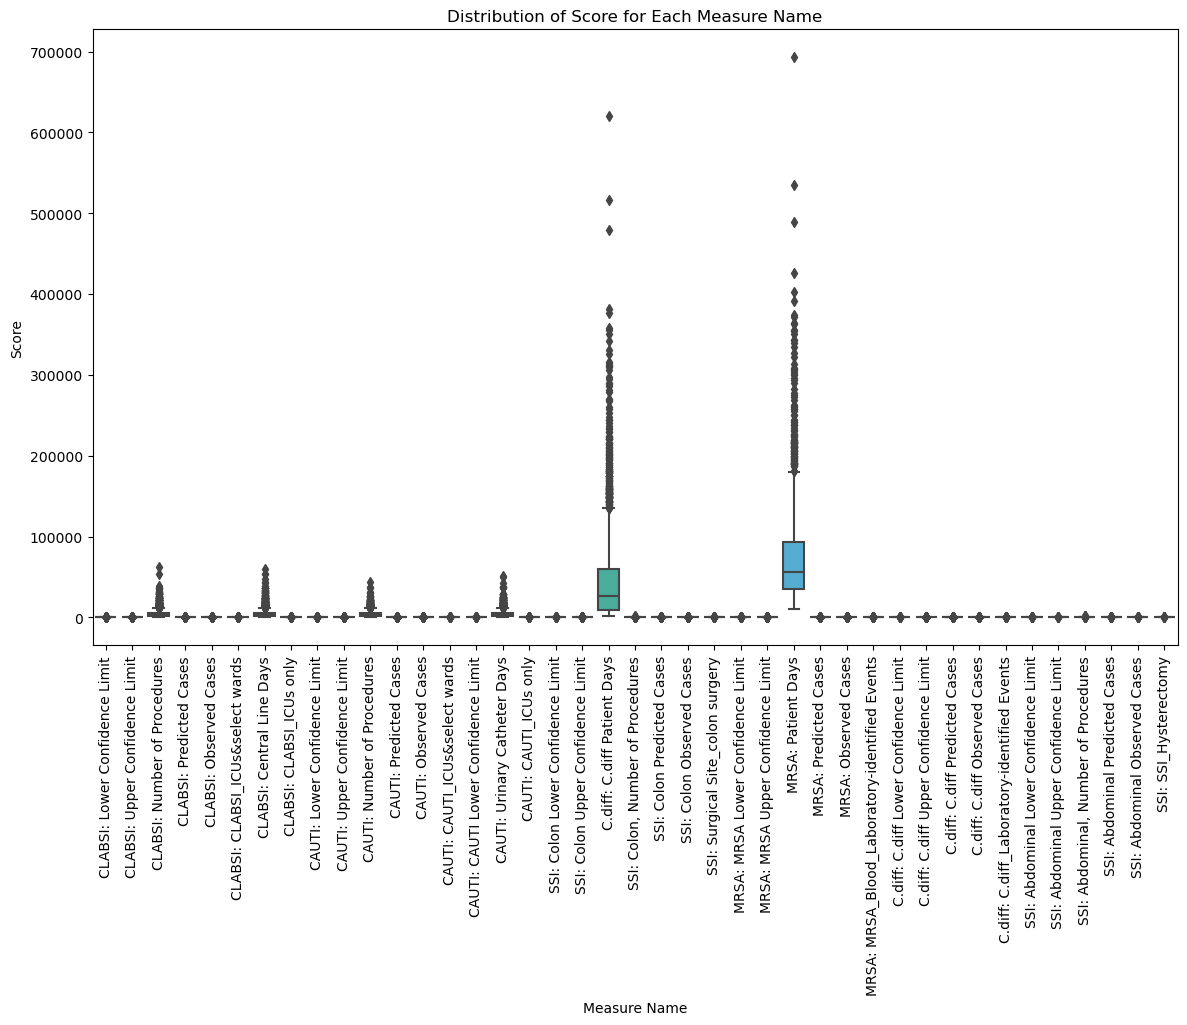

In [390]:
# Group by the 'Measure Name' column and describe the 'Score' column
measure_name_distribution = hospital_data_filtered.groupby('Measure Name')['Score'].describe()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Measure Name', y='Score', data=hospital_data_filtered)
plt.xticks(rotation=90)
plt.title('Distribution of Score for Each Measure Name')
plt.show()


In [431]:
# Remove outliers
# Function to remove outliers based on the IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each group and combine the results back into a single DataFrame
cleaned_data = hospital_data_filtered.groupby(['Measure', 'Infection']).apply(lambda x: remove_outliers(x, 'Score')).reset_index(drop=True)



/var/folders/_b/93xtqrz559j5sdj7bxgvn69w0000gn/T/ipykernel_44170/3824340941.py:12: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [432]:
# Save the DataFrame to a CSV file
filename = 'hospital_data_cleaned.csv'
cleaned_data.to_csv(filename, index=False)


# Extract the data from above df to store in three tables for a database


In [434]:
# Extract Hospitals table
hospitals_df = cleaned_data[['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number']].drop_duplicates()

filename = 'hospital_df.csv'
hospitals_df.to_csv(filename, index=False)


# Extract Measures table
measures_df = cleaned_data[['Measure ID', 'Measure Name', 'Infection', 'Measure Start Date', 'Measure End Date']].drop_duplicates()

filename = 'measure_df.csv'
measures_df.to_csv(filename, index=False)


# Extract Performance table
performance_df = cleaned_data[['Provider ID', 'Measure ID', 'Compared to National', 'Score']]

filename = 'performance_df.csv'
performance_df.to_csv(filename, index=False)



# Perform ETA again and do Data Analysis

# Hospital performance Compared to National Benchmarks:

In [400]:
# Categorize hospitals into 'Better', 'Worse', or 'Same' based on performance compared to national benchmarks
performance_categories = cleaned_data['Compared to National'].value_counts()
print(performance_categories)

# Group by performance category and count the number of hospitals in each category
performance_group = cleaned_data.groupby('Compared to National')['Measure ID'].count()
print(performance_group)

Compared to National
same      72999
better    15830
worse      3705
Name: count, dtype: int64
Compared to National
better    15830
same      72999
worse      3705
Name: Measure ID, dtype: int64


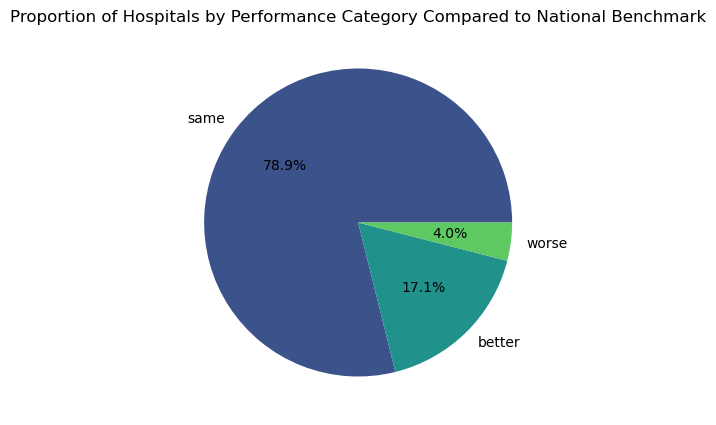

In [420]:
# Count the number of hospitals in each performance category
performance_counts = cleaned_data['Compared to National'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(performance_counts)))
plt.title('Proportion of Hospitals by Performance Category Compared to National Benchmark')
plt.show()

Results: Larger proprtion of hospital perform same as national benchmark

# How various measures are performing compared to national standards?

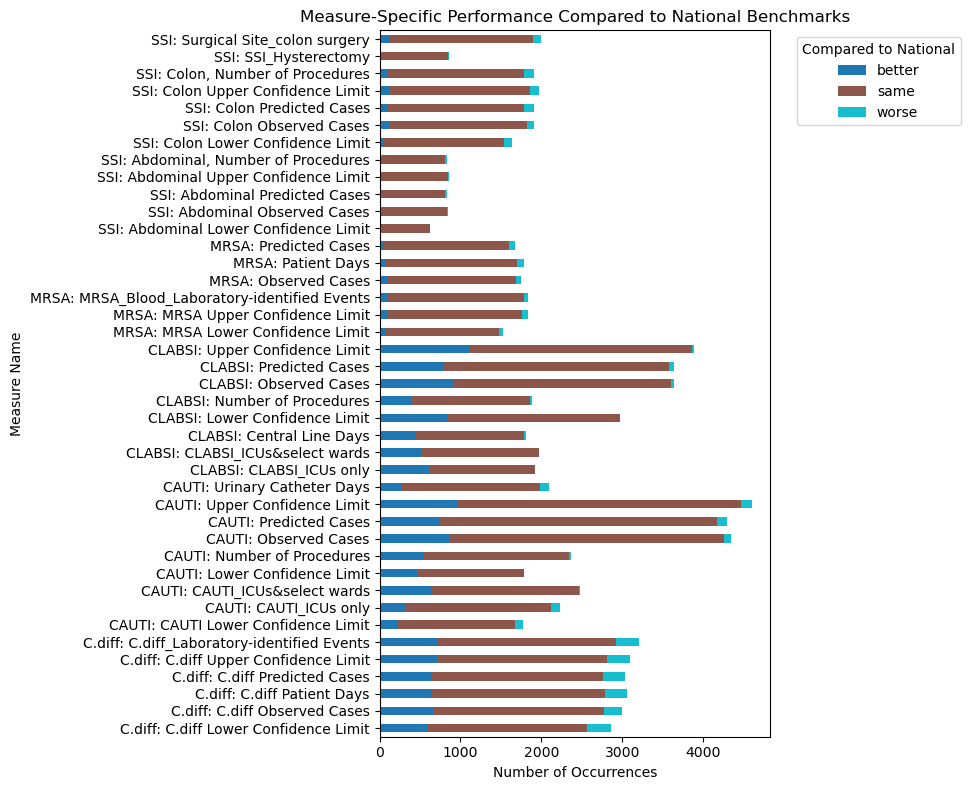

In [409]:
# Group by 'Measure Name' and 'Compared to National' and count occurrences
measure_performance = cleaned_data.groupby(['Measure Name', 'Compared to National']).size().unstack(fill_value=0)

# Plot the horizontal stacked bar chart
measure_performance.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='tab10')

# Add title and labels
plt.title('Measure-Specific Performance Compared to National Benchmarks')
plt.xlabel('Number of Occurrences')
plt.ylabel('Measure Name')

# Add legend
plt.legend(title='Compared to National', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

Null Hypothesis (H₀): Hospital performance (better, same, worse) is independent of the infection control measure. 
Alternative Hypothesis (H₁): Hospital performance (better, same, worse) is dependent on the infection control measure. 

In [427]:
# Group by 'Measure Name' and 'Compared to National' and count occurrences
measure_performance = cleaned_data.groupby(['Measure Name', 'Compared to National']).size().unstack(fill_value=0)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(measure_performance)

# Print the Chi-Square statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 7296.940041482146
P-value: 0.0


Results: reject the null hypothesis. Type of measure significantly influences how hospitals perform compared to national benchmarks

# Which infections better controlled in better hospitals?

In [ ]:
# Filter the data to include only hospitals that are "better" than the national benchmark
better_hospitals = cleaned_data[cleaned_data['Compared to National'] == 'better']

# Group by 'Infection' and count the occurrences of "better" performance
better_infection_performance = better_hospitals.groupby('Infection').size().sort_values(ascending=False)

# Plot the results to visualize which infections are better controlled
plt.figure(figsize=(7, 5))
better_infection_performance.plot(kind='bar', color='blue')

# Add title and labels
plt.title('Infections Better Controlled in Better Hospitals')
plt.xlabel('Infection')
plt.ylabel('Number of Better Performances')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

Results: The infections CLABSI, CAUTI and C.diff are better handled in better-performing hospitals.

# Which infections are worse controlled in worse-performing hospitals?

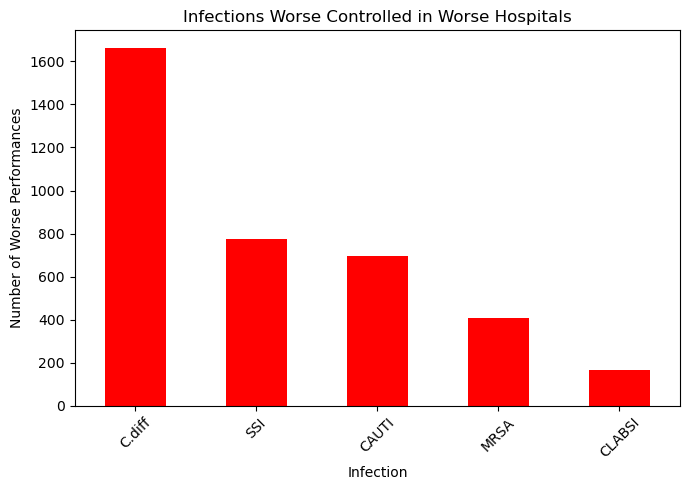

In [414]:
# Filter the data to include only hospitals that are "worse" than the national benchmark
worse_hospitals = cleaned_data[cleaned_data['Compared to National'] == 'worse']

# Group by 'Infection' and count the occurrences of "worse" performance
worse_infection_performance = worse_hospitals.groupby('Infection').size().sort_values(ascending=False)

# Plot the results to visualize which infections are worse controlled
plt.figure(figsize=(7, 5))
worse_infection_performance.plot(kind='bar', color='red')

# Add title and labels
plt.title('Infections Worse Controlled in Worse Hospitals')
plt.xlabel('Infection')
plt.ylabel('Number of Worse Performances')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

Results: The infections C.diff,SSI and  CAUTI are worsed controlled in worse -performing hospitals.

# Regional Performance Compared to National Benchmarks

Is there a significant association between regions (states) and performance categories of hosital (better, same, worse)

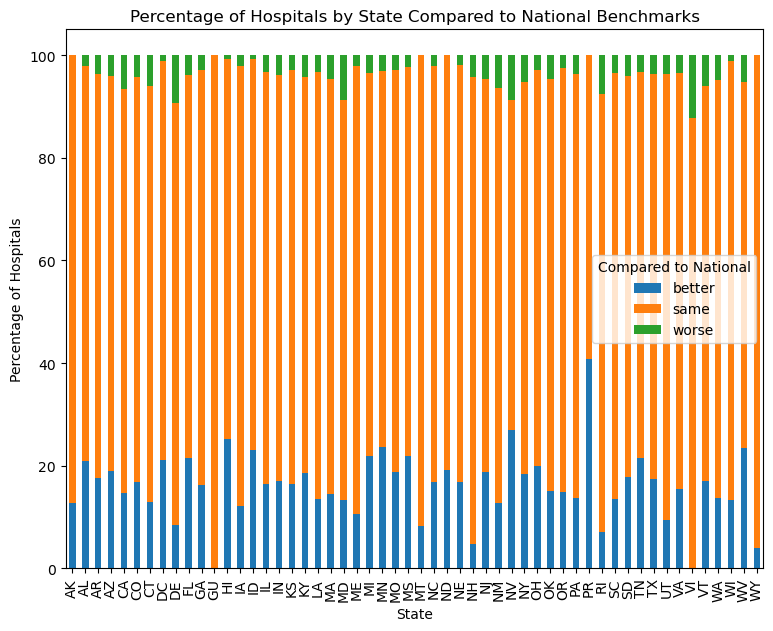

In [417]:
# Group by state and performance compared to national benchmarks
state_performance = cleaned_data.groupby(['State', 'Compared to National'])['Measure ID'].count().unstack().fillna(0)

# Calculate percentage distribution
state_performance_percentage = state_performance.div(state_performance.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
ax = state_performance_percentage.plot(kind='bar', stacked=True, figsize=(9, 7))

plt.title('Percentage of Hospitals by State Compared to National Benchmarks')
plt.xlabel('State')
plt.ylabel('Percentage of Hospitals')
plt.legend(title='Compared to National')
plt.xticks(rotation=90)
plt.show()

In [418]:
# perform chisqure
from scipy.stats import chi2_contingency

# Create a contingency table (State vs. Compared to National)
contingency_table = pd.crosstab(cleaned_data['State'], cleaned_data['Compared to National'])

# Apply the Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 1509.029378110796
P-value: 1.2063481521333772e-246


Results: Hospital performance (better, same, worse) is significantly associated with the state the hospital is in.